In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

In [4]:
data=pd.read_csv('D:\Praktikum\iris.csv',sep=",")
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Ngasih label 0 = setosa, 1 = versicolor, 2 = virginica
from sklearn.preprocessing import LabelEncoder
data['Label'] = LabelEncoder().fit_transform(data['Species'])
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [17]:
from sklearn.model_selection import train_test_split
# Definisi Y
y = data['Label']

# Definisi X
x = data.drop(['Species','Label'], axis=1)



Metode Holdout

In [30]:
# Split Data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state =None, shuffle=False)

In [46]:
#logistik Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix

logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train1,y_train1)
y_pred=logreg.predict(x_test1)
acc_logreg_1=round(accuracy_score(y_test1, y_pred)*100,2)
print(acc_logreg_1)

76.32


Metode Stratified Holdout

In [32]:
# Split Data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.25, random_state =1, stratify=y)

In [34]:
#logistik Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix

logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train2,y_train2)
y_pred=logreg.predict(x_test2)
acc_logreg_2=round(accuracy_score(y_test2, y_pred)*100,2)
print(acc_logreg_2)

97.37


Metode Holdout with random

In [23]:
# Split Data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size = 0.25, random_state =1)

In [47]:
#logistik Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix

logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train3,y_train3)
y_pred=logreg.predict(x_test3)
acc_logreg_3=round(accuracy_score(y_test3, y_pred)*100,2)
print(acc_logreg_3)

97.37


Metode Cross Validation

In [36]:
kf10=KFold(n_splits=10, shuffle=False)
kf10.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf10.split(y):
    x_train_4, x_test_4=x.iloc[train_index],x.iloc[test_index]
    y_train_4, y_test_4=y[train_index], y[test_index]

In [37]:
#logistik Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix

logreg=LogisticRegression()
logreg.fit(x_train_4,y_train_4)
y_pred=logreg.predict(x_test_4)
acc_logreg_4=round(accuracy_score(y_test_4, y_pred)*100,2)
print(acc_logreg_4)

93.33


In [40]:
models=pd.DataFrame({
    'Model':['Holdout', 'Stratified Holdout', 'Holdout with random', 'Cross Validation'],
    'Score':[acc_logreg_1,acc_logreg_2,acc_logreg_3,acc_logreg_4]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
1,Stratified Holdout,97.37
2,Holdout with random,97.37
3,Cross Validation,93.33
0,Holdout,76.32


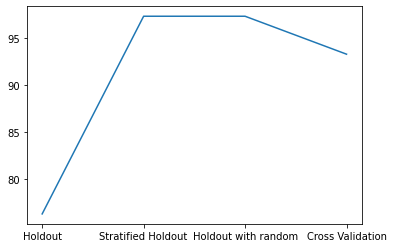

In [41]:
import matplotlib.pyplot as plt
plt.plot(models.Model, models.Score)

In [48]:
clf=LogisticRegression(max_iter=1000)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    clf=clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print(akurasi)
print(spesifisiti)
print(sensitiviti)

df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

0.5947368421052632
1.0
1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.500000,1.0,1.0
1,0.710526,1.0,1.0
2,0.684211,1.0,1.0
3,0.605263,1.0,1.0
4,0.473684,1.0,1.0


In [49]:
import statistics
statistics.mean(df_k3.Akurasi)

0.5947368421052631